In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_colors
import pandas as pd
import pandas.plotting as pd_plt
from IPython.display import display

<h1>Кластеризация k-средних и метрики</h1>

Кластеризация (clustering) является задачей разбиения набора данных на группы, называемые кластерами. Цель – разделить данные таким образом, чтобы точки, находящие в одном и том же кластере, были очень схожи друг с другом, а точки, находящиеся в разных кластерах, отличались друг от друга. Как и алгоритмы классификации, алгоритмы кластеризации присваивают (или прогнозируют) каждой точке данных номер кластера, которому она принадлежит. 

<h2>Кластеризация k-средних и метрики</h2>

Кластеризация k-средних – один из самых простых и наиболее часто используемых алгоритмов кластеризации. Сначала выбирается число кластеров k. После выбора значения k алгоритм k-средних отбирает точки, которые будут представлять центры кластеров (cluster centers). Затем для каждой точки данных вычисляется его евклидово расстояние до каждого центра кластера. Каждая точка назначается ближайшему центру кластера. Алгоритм вычисляет центроиды (centroids) – центры тяжести кластеров. Каждый центроид – это вектор, элементы которого представляют собой средние значения характеристик, вычисленные по всем точкам кластера. Центр кластера смещается в его центроид. Точки заново назначаются ближайшему центру кластера. Этапы изменения центров кластеров и переназначения точек итеративно повторяются до тех пор, пока границы кластеров и расположение центроидов не перестанут изменяться, т.е. на каждой итерации в каждый кластер будут попадать одни и те же точки данных. Следующий пример иллюстрирует работу алгоритма на синтетическом наборе данных 

<img src="pict/kmean-01.png" width=600  />

Центры кластеров представлены в виде треугольников, в то время как точки данных отображаются в виде окружностей. Цвета указывают принадлежность к кластеру. Мы указали, что ищем три кластера, поэтому алгоритм был инициализирован с помощью случайного выбора трех точек данных в качестве центров кластеров (см. «Инициализация»). Затем запускается итерационный алгоритм. Во-первых, каждая точка данных назначается ближайшему центру кластера (см. «Назначение точек (1)»). Затем центры кластеров переносятся в центры тяжести кластеров (см. «Пересчет центров (1)»). Затем процесс повторяется еще два раза. После третьей итерации принадлежность точек кластерным центрам не изменилась, поэтому алгоритм останавливается. 
В данном примере нам повезло! Мы предугадали правильное количество кластеров, а вот что получается если бы ошиблись.

<img src="pict/kmean-02.png" width=600  />

**Основные недостатки алгоритма.**

Даже если вы знаете «правильное» количество кластеров для конкретного набора данных, алгоритм k-средних не всегда может выделить их. Каждый кластер определяется исключительно его центром, это означает, что каждый кластер имеет выпуклую форму. В результате этого алгоритм k-средних может описать относительно простые формы. 
Кроме того, алгоритм k-средних предполагает, что все кластеры в определенном смысле имеют одинаковый «диаметр», он всегда проводит границу между кластерами так, чтобы она проходила точно посередине между центрами кластеров. 
Это может приводить к неожиданным результатам

<img src="pict/kmean-03.png" width=600  />

Кроме того, алгоритм k-средних предполагает, что все направления одинаково важны для каждого кластера. Следующий рисунок показывает двумерный набор данных с тремя четко обособленными группами данных. Однако эти группы вытянуты по диагонали. Поскольку алгоритм k-средних учитывает лишь расстояние до ближайшего центра кластера, он не может обработать данные такого рода: 

<img src="pict/kmean-04.png" width=600  />

Еще один пример (обычно сложный для кластеризации набор данных «Две луны» - two moons)

<img src="pict/kmean-05.png" width=600  />

Алгоритм k-средних является очень популярным алгоритмом кластеризации не только потому, что его относительно легко понять и реализовать, но и потому, что он работает сравнительно быстро. 
Алгоритм k-средних легко масштабируется на большие наборы данных. Но случайная инициализация и относительно строгие предположения о формы кластеров, а также необходимость задать число выделяемых кластеров (которое в реальной практике может быть неизвестно) приводят к существенным ограничениям в использовании алгоритма на практике.


In [2]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_predict=kmeans.predict(X)

print( "Правильность", accuracy_score(y,y_predict) )
print( "ARI", adjusted_rand_score(y,y_predict) )


Правильность 1.0
ARI 1.0


<h4>Почему правильность не работает?</h4>

In [3]:
print(y[:7])
print(y_predict[:7])

[0 1 1 1 2 2 2]
[0 1 1 1 2 2 2]


Здесь можно почитать про ARI (Скорректированый индекс Рэнда) https://en.wikipedia.org/wiki/Rand_index
Можно сказать, что это полный аналог правильности для кластерного анализа, за исключением номера класса. Но тут есть большое "НО", это не алгоритм обучения с учителем и у нас нет меток классов. Поэтому практически любая метрика качества не имеет смысла для задач кластеризации.  

<h4>Визуализация, чего тут быть не должно?</h4>

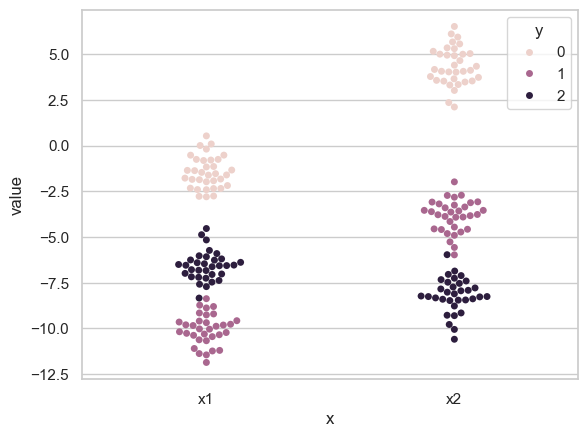

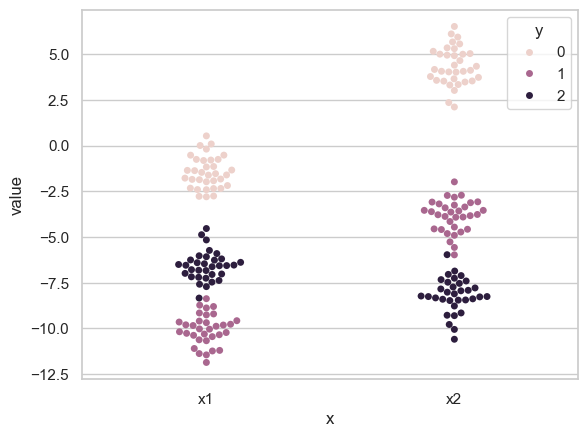

In [4]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

#######  по исходным ####### 
data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

sns.swarmplot(x="x", y="value", hue="y", data=data_m)
plt.show()

#######  по предсказанным ####### 
data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y_predict,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

sns.swarmplot(x="x", y="value", hue="y", data=data_m)
plt.show()

<h4>Еще одна визуализация</h4>

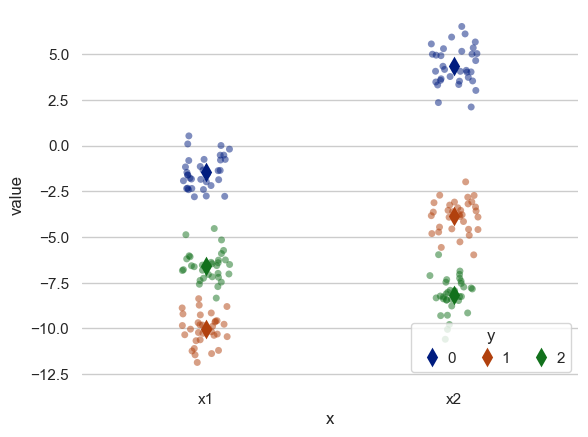

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

data=pd.concat( [
    pd.DataFrame(y_predict,columns=['y']),
    pd.DataFrame(X,columns=['x1','x2']
    )],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot( x="x", y="value", hue="y",
               data=data_m, jitter=True,  palette="dark",
               alpha=.5, zorder=1 )

sns.pointplot(x="x", y="value", hue="y",
              data=data_m, linestyle='none', palette="dark",
              markers="d", errorbar=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="y",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()

<h4>И еще одна визуализация</h4>

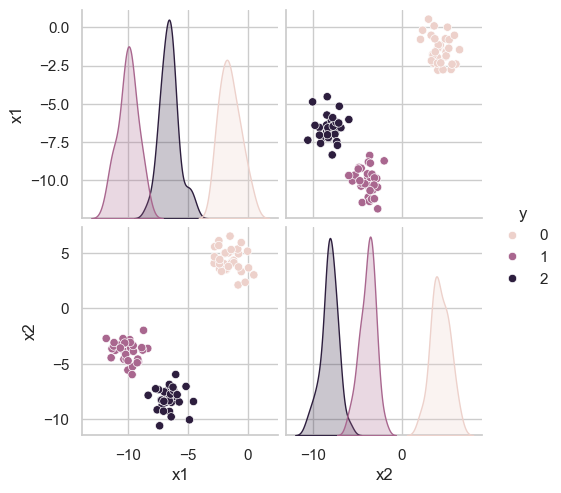

In [6]:
data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y_predict,columns=['y'])
    ],axis=1 )

sns.pairplot(data, hue="y")
plt.show()

<h2>Агломеративная кластеризация и дендрограммы</h2>

Алгомеративная кластеризация (agglomerative clustering) относится к семейству алгоритмов кластеризации, в основе которых лежат одинаковые принципы: алгоритм начинает свою работу с того, что каждую точку данных заносит в свой собственный кластер и по мере выполнения объединяет два наиболее схожих между собой кластера до тех пор, пока не будет удовлетворен определенный критерий остановки. Критерий остановки, реализованный в scikit-learn – это количество кластеров, поэтому схожие между собой кластеры объединяются до тех пор, пока не останется заданное число кластеров. Есть несколько критериев связи (linkage), которые задают точный способ измерения «наиболее схожего кластера». В основе этих критериев лежит расстояние между двумя существующими кластерами. 

В scikit-learn реализованы следующие три критерия: 
- **ward** Метод по умолчанию ward (метод Варда) выбирает и объединяет два кластера так, чтобы прирост дисперсии внутри кластеров был минимальным. Часто этот критерий приводит к получению кластеров относительно одинакового размера. 
- **average** Метод average (метод средней связи) объединяет два кластера, которые имеют наименьшее среднее значение всех расстояний, измеренных между точками двух кластеров. 
- **complete** Метод complete (метод полноой связи или метод максимальноой связи) объединяет два кластера, которые имеют наименьшее расстояние между двумя их самыми удаленными точками. 

Итог: ward подходит для большинства наборов данных, и мы будем использовать именно его в наших примерах. Если кластеры имеют сильно различающиеся размеры (например, один кластер содержит намного больше точек данных, чем все остальные), использование критериев average или complete может дать лучший результат. 

Следующий рисунок иллюстрирует работу алгоритма агломеративной кластеризации на двумерном массиве данных, который ищет три кластера: 

<img src="pict/aglom-01.png" width=600  />

Изначально количество кластеров равно количеству точек данных. 

Затем на каждом шаге объединяются два ближайших друг к другу кластера. На первых четырех шагах выбираются кластеры, состоящие из отдельных точек, и объединяются в кластеры, состоящие из двух точек. На шаге 5 один из 2-точечных кластеров вбирает в себя третью точку и т.д. На шаге 9 у нас остается три кластера. Поскольку мы установили количество кластеров равным 3, алгоритм останавливается. 

Отследив полный процесс принятия решения алгоритмом агломеративной кластеризации от ситуации «одна точка - один класс» до ситуации «все точки - один класс», мы сможем строить дерево решений, в данном случае так называемую дендограмму. Где длинна ветви соответствуют «кластерному расстоянию» (грубо говоря усилию, который потратил алгоритм, для объединения точек в один класс). Анализ дендограмм позволит принимать решения о количестве кластеров в задаче.

Подобная схема решения представлена на рисунке

<img src="pict/aglom-02.png" width=600  />


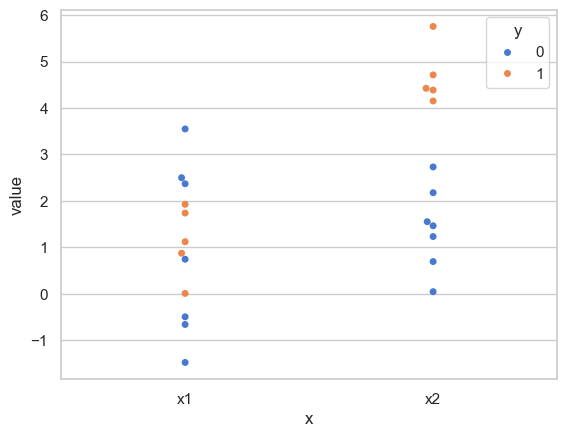

In [7]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=0, n_samples=12)

agg = AgglomerativeClustering(n_clusters=2) 
y = agg.fit_predict(X) # совмещенная команда fit и predict

import seaborn as sns
sns.set(style="whitegrid", palette="muted")

data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

sns.swarmplot(x="x", y="value", hue="y", data=data_m)
plt.show()

<h4>Дендрограммы, способ 1</h4>

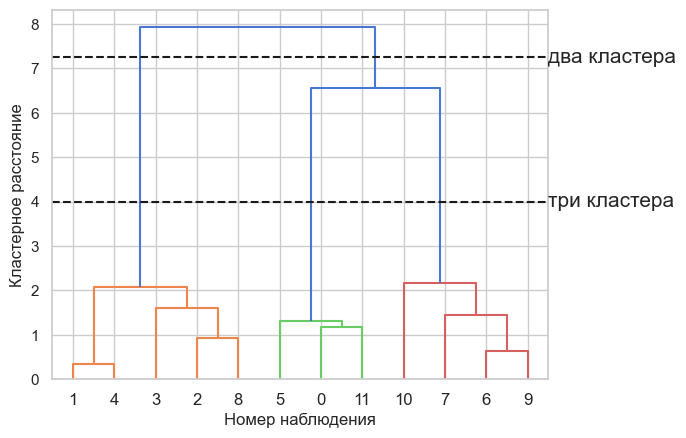

In [8]:
from scipy.cluster.hierarchy import dendrogram, ward
# функция кластерицации ward из SciPy позволяет 
# найти массив растояний вычесленный в ходе AgglomerativeClustering                                
X, y = make_blobs(random_state=0, n_samples=12)

agg = AgglomerativeClustering() 
y = agg.fit_predict(X) # совмещенная команда fit и predict

linkage_array = ward(X)

dendrogram(linkage_array)
                                       
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, 'два кластера', va='center', fontdict={'size': 15}) 
ax.text(bounds[1], 4, 'три кластера', va='center', fontdict={'size': 15}) 
plt.xlabel("Номер наблюдения")
plt.ylabel("Кластерное расстояние")
plt.show()

<h4>Дендрограммы, способ 2</h4>

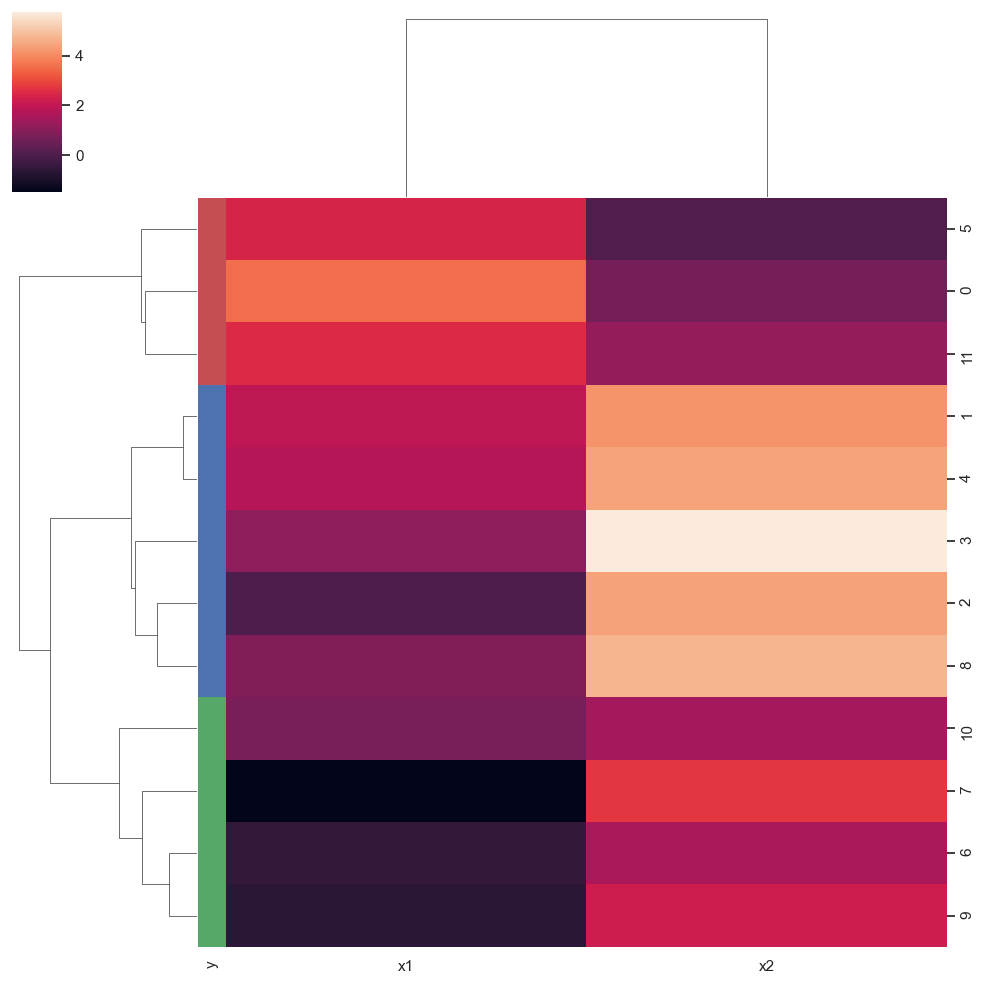

In [9]:
import seaborn as sns 
sns.set(color_codes=True)

X, y = make_blobs(random_state=0, n_samples=12)

agg = AgglomerativeClustering() 
agg = AgglomerativeClustering(n_clusters=3) 
y = agg.fit_predict(X) # совмещенная команда fit и predict

data=pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']),
    pd.DataFrame(y,columns=['y'])
    ],axis=1 )

y_col=data.pop('y')

lut = dict(zip( pd.unique( y_col ), "rbg"))
row_colors = y_col.map(lut)
g = sns.clustermap(data,row_colors=row_colors)
plt.show()

К сожалению, алгоритм агломеративной кластеризации по-прежнему не в состоянии обработать сложные данные типа набора two_moons. Чего нельзя сказать о DBSCAN, следующем алгоритме, который мы рассмотрим. 

<h2>Самая крутая кластеризация DBSCAN, но и самая слабо управляемая</h2>

Алгоритм DBSCAN ( based spatial clustering of applications with noise) – плотностный алгоритм кластеризации пространственных данных с присутствием шума.

Основные преимущества алгоритма DBSCAN заключаются в том, что пользователю не нужно заранее задавать количество кластеров, алгоритм может выделить кластеры сложной формы и способен определить точки, которые не принадлежат какому-либо кластеру. 

DBSCAN работает немного медленнее, чем алгоритм агломеративной кластеризации и алгоритм k-средних, но также может масштабироваться на относительно большие наборы данных. 

DBSCAN определяет точки, расположенные в «густонаселенных» областях пространства характеристик, когда многие точки данных расположены близко друг к другу. Эти области называются плотными (dense) областями пространства характеристик. 

Идея алгоритма DBSCAN заключается в том, что кластеры образуют плотные области данных, которые отделены друг от друга относительно пустыми областями. 
Точки, находящиеся в плотной области, называются ядровыми примерами (core samples) или ядровыми точками (core points). 

Алгоритм DBSCAN имеет два параметра: min_samples и eps. Если по крайней мере min_samples точек находятся в радиусе окрестности eps рассматриваемой точки, то эта точка классифицируется как ядровая. 
Ядровые точки, расстояния между которыми не превышают радиус окрестности eps, помещаются алгоритмом DBSCAN в один и тот же кластер. 

1. На старте алгоритм выбирает произвольную точку. 
2. Затем он находит все точки, удаленные от стартовой точки на расстоянии, не превышающем радиус окрестности eps. Если множество точек, находящихся в пределах радиуса окрестности eps, меньше значения min_samples, стартовая точка помечается как шум (noise), это означает, что она не принадлежит какому-либо кластеру. Если это множество точек больше значения min_samples, стартовая точка помечается как ядровая и ей назначается метка нового кластера. 
3. Затем посещаются все соседи этой точки (находящиеся в пределах eps). Если они еще не были присвоены кластеру, им присваивается метка только что созданного кластера. Если они являются ядровыми точками, поочередно посещаются их соседи и т.д. Кластер растет до тех пор, пока не останется ни одной ядерной точки в пределах радиуса окрестности eps. Затем выбирается другая точка, которая еще не была посещена, и повторяется та же самая процедура. 

В итоге получаем три вида точек: ядровые точки, точки, которые находятся в пределах радиуса окрестности eps ядровых точек (так называемые пограничные точки или boundary points) и шумовые точки. 

При многократном применении алгоритма DBSCAN к конкретному набору данных результаты кластеризации ядровых точек будут всегда одинаковыми, при этом одни и те же точки всегда будут помечаться как шумовые. 
Однако пограничная точка может быть соседом для ядровых точек из нескольких кластеров. Поэтому кластерная принадлежность пограничных точек зависит от порядка посещения точек.
Как правило, существует лишь несколько пограничных точек, поэтому эта слабая зависимость результатов кластеризации от порядка посещения точек не имеет значения. 
Пример работы алгоритма представлен на рисунке

<img src="pict/dbscan-01.png" width=600  />

На этом графике точки, которые принадлежат кластерам, окрашены сплошным цветом, а шумовые точки – белым цветом. Ядровые точки показаны в виде больших маркеров, тогда как пограничные точки отображаются в виде небольших маркеров. Увеличение значения eps (слева направо на рисунке) означает включение большего количества точек в кластер. Это приводит к росту размеров кластеров, но также может привести к тому, что несколько кластеров будут объединены в один. Увеличение значения min_samples (сверху вниз на рисунке) означает уменьшение количества ядерных точек и увеличение количества шумовых точек. 

Параметр eps чуть более важен, поскольку он определяет, что подразумевается под «близостью» точек друг к другу. Очень маленькое значение eps будет означать отсутствие ядерных точек и может привести к тому, что все точки будут помечены как шумовые. Очень большое значение eps приведет к тому, что все точки сформируют один кластер. 

Значение min_samples главным образом определяет, будут ли точки, расположенные в менее плотных областях, помечены как выбросы или как кластеры. Если увеличить значение min_samples, все, что могло бы стать кластером с количеством точек, не превышающим min_samples, будет помечено как шум. Поэтому значение min_samples задает минимальный размер кластера. 

Несмотря на то, что в алгоритме DBSCAN не нужно явно указывать количество кластеров, значение eps неявно задает количество выделяемых кластеров. Иногда подобрать оптимальное значение eps становится проще после масштабирования данных с помощью StandardScaler или MinMaxScaler, так как использование этих методов масштабирования гарантирует, что все характеристики будут иметь одинаковый масштаб. 

Рисунок показывает результат выполнения алгоритма DBSCAN для наборе данных two_moons. Алгоритм фактически находит две группы данных в форме полумесяцев и разделяет их, используя настройки по умолчанию (рассмотрим в тетрадке). 

<img src="pict/dbscan-02.png" width=600  />

**Внимание!** Используя DBSCAN, будьте осторожны при работе с возвращаемыми номерами кластеров. 

_**Использование -1 для обозначения шума может привести к неожиданным эффектам, если метки кластеров будут использоваться для индексирования другого массива.**_ 

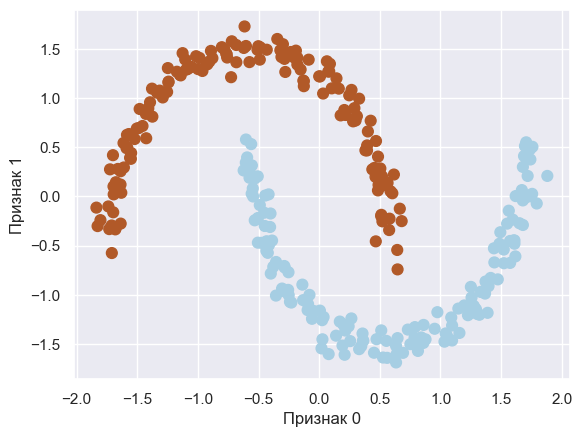

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60, cmap="Paired") 
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

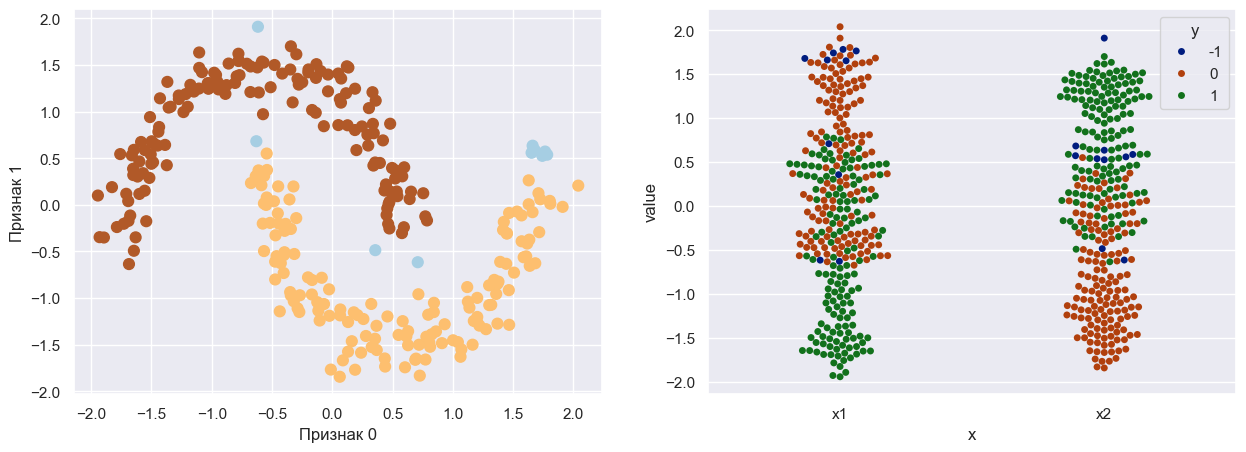

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
dbscan = DBSCAN(eps=0.3,min_samples=10)  # eps=0.3,min_samples=5    eps=0.25,min_samples=3   
clusters = dbscan.fit_predict(X_scaled)

data=pd.concat( [
    pd.DataFrame(X_scaled,columns=['x1','x2']),
    pd.DataFrame(clusters,columns=['y'])
    ],axis=1 )

data_m=pd.melt(data,"y",var_name="x")

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.set_xlabel("Признак 0")
ax1.set_ylabel("Признак 1")
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60, cmap="Paired") 


sns.swarmplot(x="x", y="value", hue="y", data=data_m, ax=ax2, palette="dark")

plt.show()



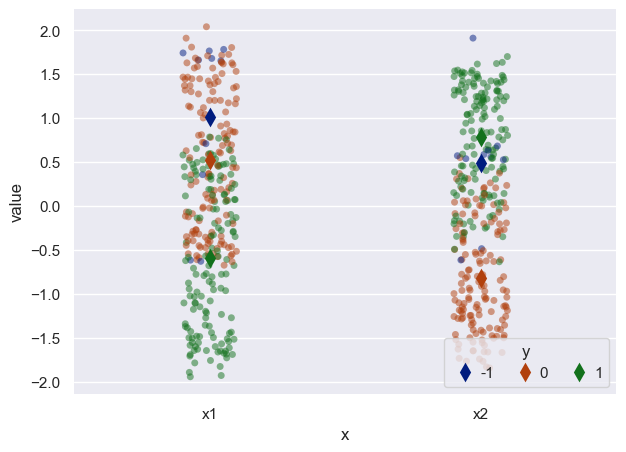

In [12]:
f, ax = plt.subplots(figsize=(7,5))
sns.despine(bottom=True, left=True)

sns.stripplot( x="x", y="value", hue="y",
           data=data_m, jitter=True, palette="dark",
           alpha=.5, zorder=1 )

sns.pointplot(x="x", y="value", hue="y",
          data=data_m, linestyle='none', palette="dark",
          markers="d", errorbar=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="y",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()

## Метрики

В связи с тем, что метрика предполагает сравнение результата с эталоном, а в кластеризации эталона нет, то в реальных задачах пользоваться метрикой бесполезно и может быть вредно.

Единственная область в которой применение метрики имеет под собой основание - это процесс разработки новых алгоритмов кластеризации, когда у нас есть представление об истинный данных.

**Сравнение алгоритмов кластеризации в <code>scikit-learn</code>** 

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


<img src="pict/scl-01.png"/>